# Construct Binary Tree from Inorder and Preorder Transversal

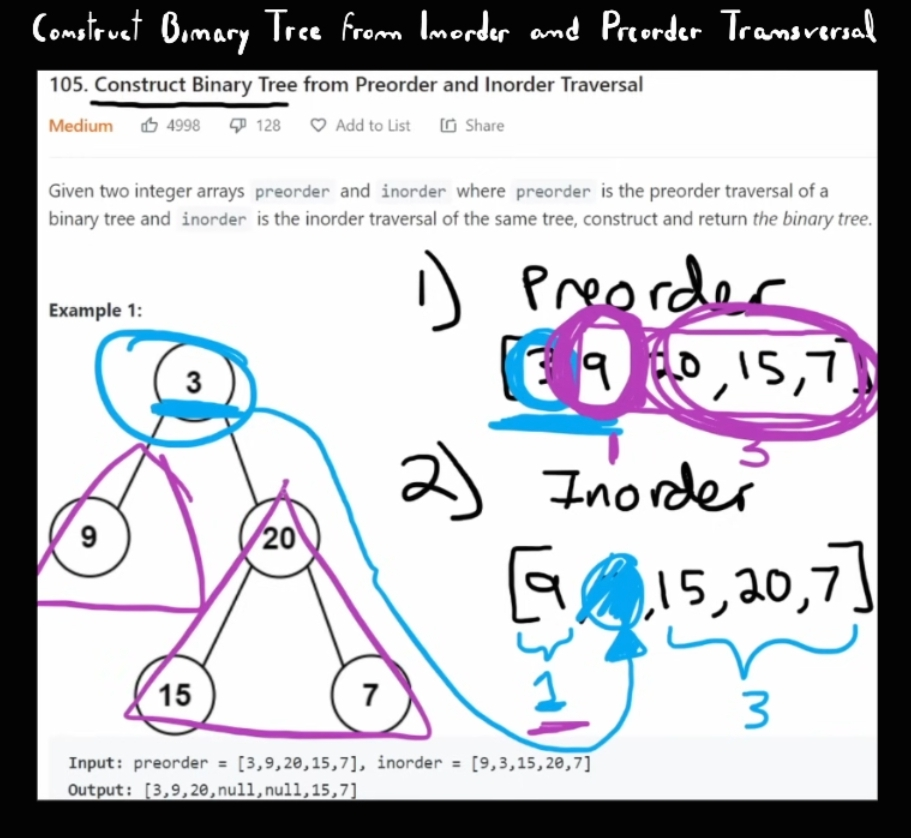

In [ ]:
from typing import List


# Definition for a binary tree node
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


class Solution:
    def build_tree(self, preorder: List[int], inorder: List[int]) -> TreeNode:
        # this is a recursive algorithm, so we will start with a base case
        # if we have no preorder or inorder, then we return nothing as we
        # have no nodes
        if not preorder or not inorder:
            return None
        root = TreeNode(val=preorder[0])
        # whatever the preorder[0] value was, we want to find its position in the
        # inorder array
        mid = inorder.index(preorder[0])
        # now we can build the subtree, RECURSIVELY
        root.left = self.build_tree(preorder=preorder[1:mid], inorder=inorder[:mid])
        root.right = self.build_tree(
            preorder=preorder[mid + 1 :], inorder=inorder[mid + 1 :]
        )
        # the tree is now built so we return it
        return root

# Count Good Nodes in Binary Tree

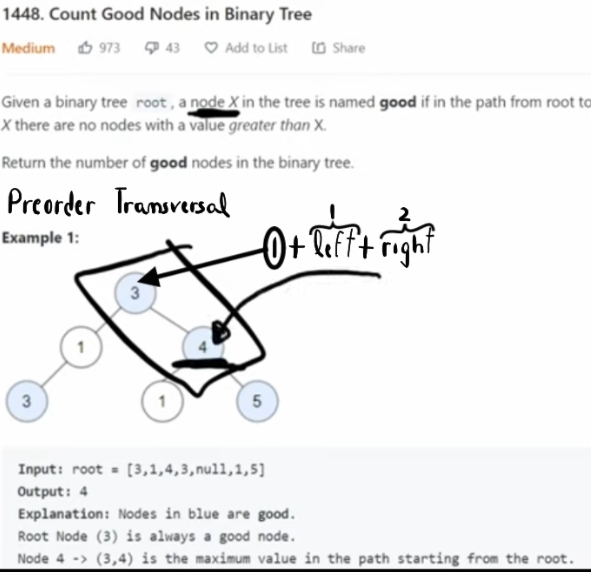

In [ ]:
from typing import List


# Definition for a binary tree node
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


class Solution:
    def good_nodes(self, root: TreeNode) -> int:
        def dfs(node, max_val):
            # base case
            if not node:
                return 0
            # whether the current node is a good node
            # 1 - good node, 0 - not a good node
            res = 1 if node.val >= max_val else 0
            max_val = max(max_val, node.val)
            # left subtree number of good nodes
            res += dfs(node.left, max_val)
            # left subtree number of good nodes
            res += dfs(node.right, max_val)
            return res

        return dfs(root, root.val)

# Validate Binary Search Tree

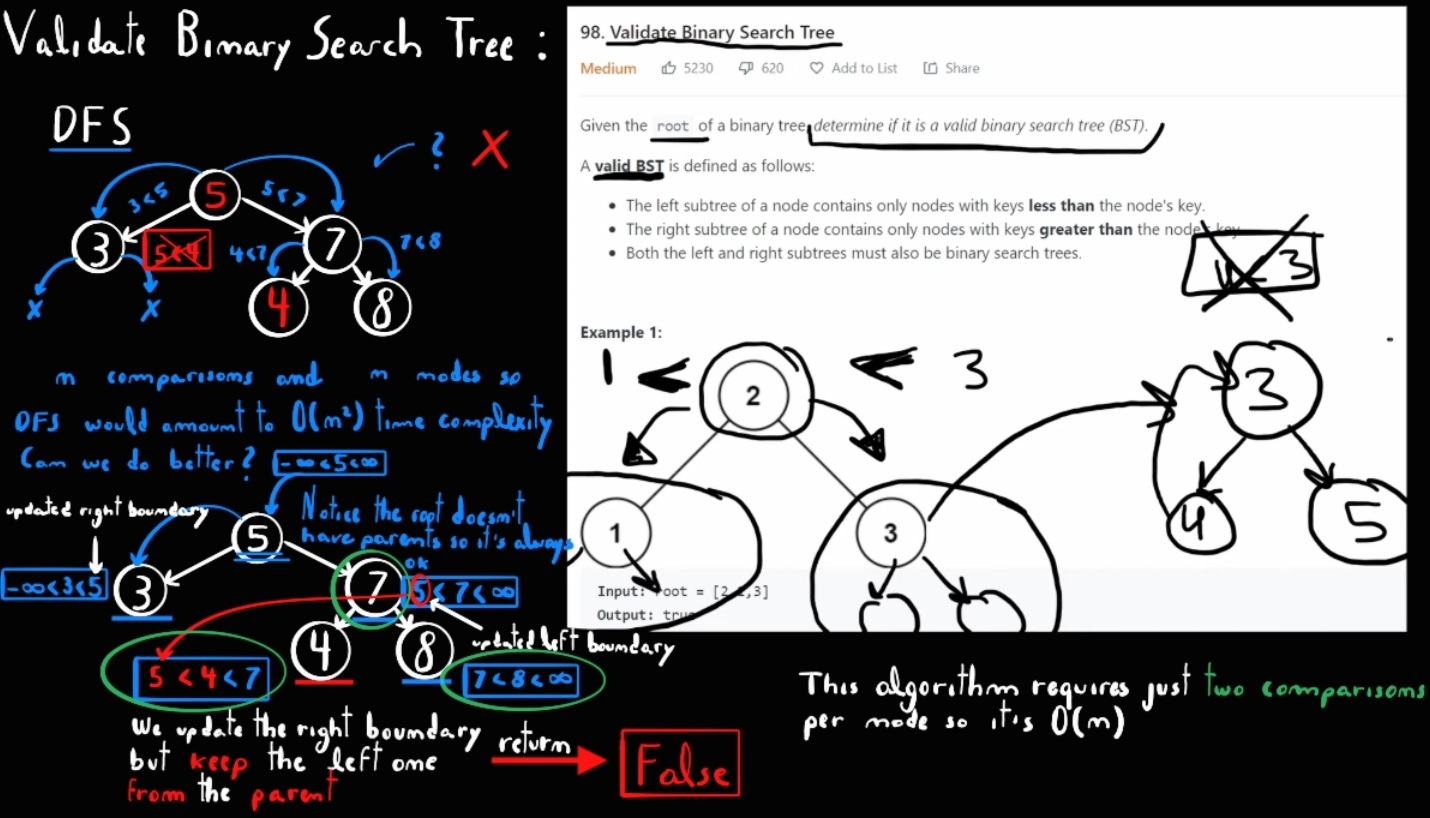

In [ ]:
# Definition for a binary tree node
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


class Solution:
    def is_valid_bst(self, root: TreeNode) -> bool:
        def valid(node, left_boundary, right_boundary):
            # base case True
            # because an empty binary search tree is still
            # a binary search tree
            if not node:
                return True
            # base case False
            if not (left_boundary < node.val < right_boundary):
                return False
            # left subtree: we keep the left boundary but update the right
            # one to the value of the current node
            # right subtree: we keep the right boundary but update the left
            # one to the value of the current node
            return valid(node.left, left_boundary, node.val) and valid(
                node.right, node.val, right_boundary
            )

        return valid(root, float("-inf"), float("inf"))